In [207]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [208]:
# import data
df = pd.read_csv('sports_management_encoded.csv')
df.head(10)

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,2.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [209]:
# get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [210]:
# import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [211]:
# create a function for the RandomForestClassifier
def RandomForestClassifier_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    print(f'Training Score: {clf.score(X_train, y_train)}')
    print(f'Testing Score: {clf.score(X_test, y_test)}')
    return clf

In [212]:
# create a function to find the feature importance
def feature_importance(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf = RandomForestClassifier(max_depth=12, random_state=42).fit(X_train, y_train)
    feature_importances = clf.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 5))
    sorted_idx = np.argsort(feature_importances)
    sortedfeature_names = feature_names[sorted_idx]
    plt.barh(sortedfeature_names, feature_importances[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.show()
    return sorted(zip(feature_importances, feature_names), reverse=True)


In [213]:
# create a function for the depth parameter
def RandomForestClassifier_model_depth(X, y, depth):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    clf = RandomForestClassifier(max_depth=depth, random_state=42).fit(X_train, y_train)
    print(f'Training Score: {clf.score(X_train, y_train)}')
    print(f'Testing Score: {clf.score(X_test, y_test)}')
   
    return clf


In [214]:
# split the data into features and target
X = df.drop(columns=['Sustainability Score'])
y = df['Sustainability Score']


In [215]:
# run the RandomForestClassifier model
RandomForestClassifier_model(X, y)


Training Score: 0.9763790849673203
Testing Score: 0.44662745098039214


RandomForestClassifier(random_state=42)

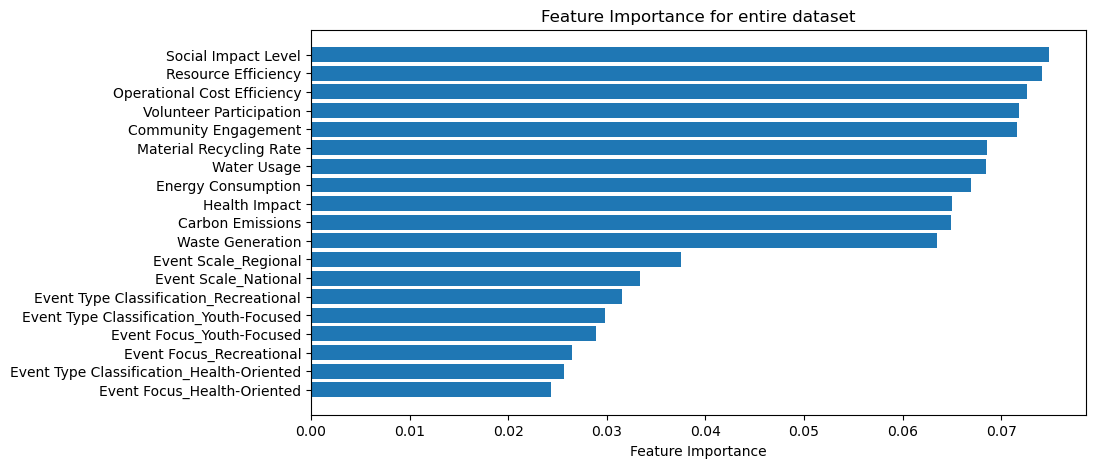

[(0.074860664162114, 'Social Impact Level'),
 (0.07409979628920473, 'Resource Efficiency'),
 (0.07257700569790988, 'Operational Cost Efficiency'),
 (0.07178323992494759, 'Volunteer Participation'),
 (0.07161605194085262, 'Community Engagement'),
 (0.06853538891828204, 'Material Recycling Rate'),
 (0.06841502179997255, 'Water Usage'),
 (0.0669596726684458, 'Energy Consumption'),
 (0.06504168376016481, 'Health Impact'),
 (0.0649157401639548, 'Carbon Emissions'),
 (0.06351277758713778, 'Waste Generation'),
 (0.03751558821891609, 'Event Scale_Regional'),
 (0.03338024472881718, 'Event Scale_National'),
 (0.0315753449545059, 'Event Type Classification_Recreational'),
 (0.029861350682265208, 'Event Type Classification_Youth-Focused'),
 (0.02887970085405754, 'Event Focus_Youth-Focused'),
 (0.026459999340963106, 'Event Focus_Recreational'),
 (0.02565336146386824, 'Event Type Classification_Health-Oriented'),
 (0.02435736684362029, 'Event Focus_Health-Oriented')]

In [216]:
# run the feature importance function
feature_importance(X, y, 'Feature Importance for entire dataset')

In [217]:
# run the RandomForestClassifier model with a depth parameter looping from 1 to 15

for i in range(1, 16):
    print(f'Depth: {i}')
    RandomForestClassifier_model_depth(X, y, i)
    

Depth: 1
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 2
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 3
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 4
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 5
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 6
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 7
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 8
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 9
Training Score: 0.4989281045751634
Testing Score: 0.491843137254902
Depth: 10
Training Score: 0.5001437908496732
Testing Score: 0.49180392156862746
Depth: 11
Training Score: 0.506313725490196
Testing Score: 0.49176470588235294
Depth: 12
Training Score: 0.529202614379085
Testing Score: 0.4915294117647059
Depth: 13
Training Score: 0.5726928104575163
Testing Score: 0.49125490

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [219]:
#Random Undersampler

In [220]:
# # Instantiate a RandomUnderSampler instance
# rus = RandomUnderSampler(random_state=1)

# # Fit the training data to the random undersampler model
# X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# # Count distinct values for the resampled target data
# y_undersampled.value_counts()

In [221]:
# # Instantiate a new RandomForestClassier model
# model_undersampled = RandomForestClassifier()

# # Fit the undersampled data the new model
# model_undersampled.fit(X_undersampled, y_undersampled)

In [222]:
# #Evaluate the model
# print(f"Training Data Score: {model_undersampled.score(X_undersampled, y_undersampled)}")
# print(f"Testing Data Score: {model_undersampled.score(X_test, y_test)}")

In [223]:
# # Predict labels for oversampled testing features
# y_pred_undersampled = model_undersampled.predict(X_test)

In [224]:
#Random Oversampler

In [225]:
# # Instantiate a RandomOversampler instance
# ros = RandomOverSampler(random_state=1)

In [226]:
# # Fit the training data to the `RandomOverSampler` model
# X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [227]:
# # Count distinct values
# y_oversampled.value_counts()

In [228]:
# # Instantiate a new RandomForestClassier model
# model_oversampled = RandomForestClassifier()

# # Fit the oversampled data the new model
# model_oversampled.fit(X_oversampled, y_oversampled)

In [229]:
# #Evaluate the model
# print(f"Training Data Score: {model_oversampled.score(X_oversampled, y_oversampled)}")
# print(f"Testing Data Score: {model_oversampled.score(X_test, y_test)}")

In [230]:
# # Predict labels for oversampled testing features
# y_pred_oversampled = model_oversampled.predict(X_test)

In [231]:
#Cluster Centroids

In [232]:
# # Instantiate a ClusterCentroids instance
# cc_sampler = ClusterCentroids(random_state=1)

In [233]:
# # Fit the training data to the cluster centroids model
# X_resampled, y_resampled = cc_sampler.fit_resample(X_train, y_train)

In [234]:
# # Count distinct values for the resampled target data
# y_resampled.value_counts()

In [235]:
# # Instantiate a new RandomForestClassier model
# cc_model = RandomForestClassifier()

# # Fit the resampled data the new model
# cc_model.fit(X_resampled, y_resampled)

In [236]:
# #Evaluate the model
# print(f"Training Data Score: {cc_model.score(X_resampled, y_resampled)}")
# print(f"Testing Data Score: {cc_model.score(X_test, y_test)}")

In [237]:
# # Predict labels for resampled testing features
# cc_y_pred = cc_model.predict(X_test)

In [238]:
#SMOTE

In [239]:
# # Instantiate the SMOTE instance 
# # Set the sampling_strategy parameter equal to auto
# smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [240]:
# # Fit the training data to the smote_sampler model
# X_resampled, y_resampled = smote_sampler.fit_resample(X_train, y_train)

In [241]:
# # Count distinct values for the resampled target data
# y_resampled.value_counts()

In [242]:
# # Instantiate a new RandomForestClassier model 
# smote_model = RandomForestClassifier()

# # Fit the resampled data to the new model
# smote_model.fit(X_resampled, y_resampled)

In [243]:
# #Evaluate the model
# print(f"Training Data Score: {smote_model.score(X_resampled, y_resampled)}")
# print(f"Testing Data Score: {smote_model.score(X_test, y_test)}")

In [244]:
# # Predict labels for resampled testing features
# smote_y_pred = smote_model.predict(X_test)

In [245]:
#SMOTEENN

In [246]:
# # Instantiate the SMOTEENN instance
# smote_enn = SMOTEENN(random_state=1)

In [247]:
# # Fit the model to the training data
# X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [248]:
# # Instantiate a new RandomForestClassier model
# smoteenn_model = RandomForestClassifier()

# # Fit the resampled data the new model
# smoteenn_model.fit(X_resampled, y_resampled)

In [249]:
# #Evaluate the model
# print(f"Training Data Score: {smoteenn_model.score(X_resampled, y_resampled)}")
# print(f"Testing Data Score: {smoteenn_model.score(X_test, y_test)}")

In [250]:
# # Predict labels for resampled testing features
# smoteenn_y_pred = smoteenn_model.predict(X_test)

In [251]:
# # Print classification reports
# print(f"Classification Report - Original Data")
# print(classification_report(y_test, y_pred))
# print("---------")
# print(f"Classification Report - Undersampled Data")
# print(classification_report(y_test, y_pred_undersampled))
# print("---------")
# print(f"Classification Report - Oversampled Data")
# print(classification_report(y_test, y_pred_oversampled))
# print("---------")
# print(f"Classification Report - Resampled Data - CentroidClusters")
# print(classification_report(y_test, cc_y_pred))
# print("---------")
# print(f"Classification Report - Resampled Data - SMOTE")
# print(classification_report(y_test, smote_y_pred))
# print("---------")
# print(f"Classification Report - Resampled Data - SMOTEENN")
# print(classification_report(y_test, smoteenn_y_pred))

In [252]:
#Split Dataframes

In [253]:
# Model to target only sustainability columns we believe should be included in the model
sustainability_columns = ['Energy Consumption', 'Carbon Emissions', 'Water Usage', 'Waste Generation', 'Material Recycling Rate', 'Sustainability Score']
df_sustainable = df[sustainability_columns]
df_sustainable.head(10)

,Energy Consumption,Carbon Emissions,Water Usage,Waste Generation,Material Recycling Rate,Sustainability Score
0,1.0,2.0,1.0,2.0,1.0,0.0
1,2.0,1.0,1.0,2.0,0.0,1.0
2,2.0,2.0,1.0,2.0,1.0,2.0
3,2.0,2.0,1.0,2.0,1.0,2.0
4,1.0,2.0,2.0,0.0,2.0,0.0
5,1.0,1.0,1.0,2.0,0.0,2.0
6,0.0,2.0,1.0,1.0,1.0,2.0
7,2.0,2.0,0.0,1.0,0.0,1.0
8,2.0,2.0,0.0,1.0,0.0,1.0
9,2.0,2.0,0.0,2.0,0.0,0.0


In [254]:
# split the data into features and target
X_s = df_sustainable.drop(columns=['Sustainability Score'])
y_s = df_sustainable['Sustainability Score']

In [255]:
# run the ExtraTreesClassifier model
RandomForestClassifier_model(X_s, y_s)

Training Score: 0.49887581699346406
Testing Score: 0.49098039215686273


RandomForestClassifier(random_state=42)

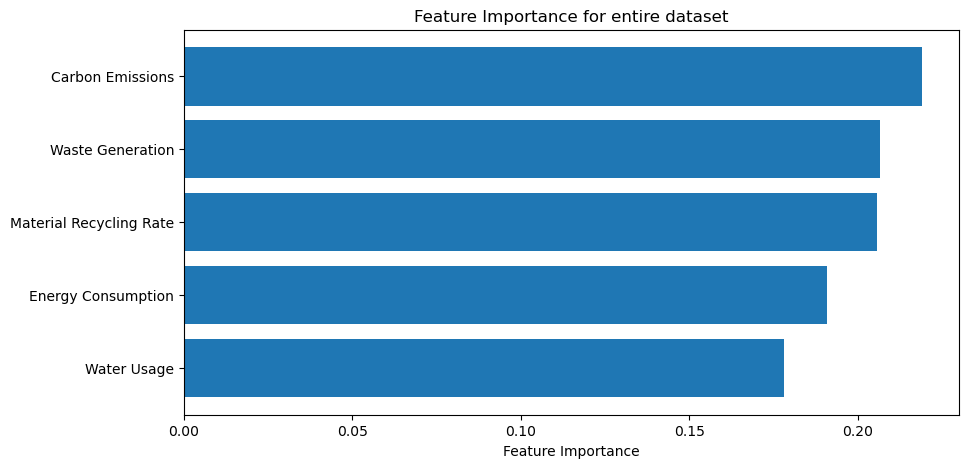

[(0.2190175120768757, 'Carbon Emissions'),
 (0.20650767247141977, 'Waste Generation'),
 (0.20568597092176477, 'Material Recycling Rate'),
 (0.19082783622865143, 'Energy Consumption'),
 (0.1779610083012885, 'Water Usage')]

In [256]:
# run the feature importance function
feature_importance(X_s, y_s, 'Feature Importance for entire dataset')

In [257]:
# run the RandomForestClassifier model with a depth parameter looping from 1 to 15

for i in range(1, 16):
    print(f'Depth: {i}')
    RandomForestClassifier_model_depth(X_s, y_s, i)

Depth: 1
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 2
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 3
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 4
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 5
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 6
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 7
Training Score: 0.498797385620915
Testing Score: 0.4916862745098039
Depth: 8
Training Score: 0.4988235294117647
Testing Score: 0.49137254901960786
Depth: 9
Training Score: 0.49887581699346406
Testing Score: 0.49098039215686273
Depth: 10
Training Score: 0.49887581699346406
Testing Score: 0.49098039215686273
Depth: 11
Training Score: 0.49887581699346406
Testing Score: 0.49098039215686273
Depth: 12
Training Score: 0.49887581699346406
Testing Score: 0.49098039215686273
Depth: 13
Training Score: 0.49887581699346406
Testing Score

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [259]:
# Model to target only sustainability columns as indicated by the dataset creator
sustainability_columns_creator = ['Energy Consumption', 'Carbon Emissions', 'Waste Generation', 'Sustainability Score']
df_sustainable_creator = df[sustainability_columns_creator]
df_sustainable_creator.head(10)

,Energy Consumption,Carbon Emissions,Waste Generation,Sustainability Score
0,1.0,2.0,2.0,0.0
1,2.0,1.0,2.0,1.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,1.0,2.0,0.0,0.0
5,1.0,1.0,2.0,2.0
6,0.0,2.0,1.0,2.0
7,2.0,2.0,1.0,1.0
8,2.0,2.0,1.0,1.0
9,2.0,2.0,2.0,0.0


In [260]:
# split the data into features and target
X_s_c = df_sustainable_creator.drop(columns=['Sustainability Score'])
y_s_c = df_sustainable_creator['Sustainability Score']

In [261]:
# run the ExtraTreesClassifier model
RandomForestClassifier_model(X_s_c, y_s_c)

Training Score: 0.4987581699346405
Testing Score: 0.491843137254902


RandomForestClassifier(random_state=42)

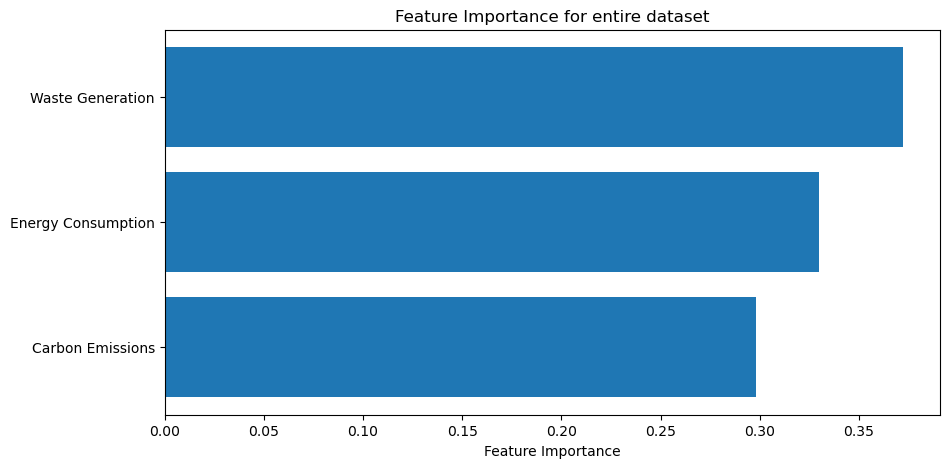

[(0.3720204075067325, 'Waste Generation'),
 (0.32998898328057674, 'Energy Consumption'),
 (0.29799060921269066, 'Carbon Emissions')]

In [262]:
# run the feature importance function
feature_importance(X_s_c, y_s_c, 'Feature Importance for entire dataset')

In [263]:
# run the RandomForestClassifier model with a depth parameter looping from 1 to 15

for i in range(1, 16):
    print(f'Depth: {i}')
    RandomForestClassifier_model_depth(X_s_c, y_s_c, i)

Depth: 1
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 2
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 3
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 4
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 5
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 6
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 7
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 8
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 9
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 10
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 11
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 12
Training Score: 0.4987581699346405
Testing Score: 0.491843137254902
Depth: 13
Training Score: 0.4987581699346405
Testing Score: 0.49184313725

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [265]:
# Model for Social Impact Feature as indicated by the dataset creator
social_imp_columns = ['Community Engagement', 'Volunteer Participation','Health Impact','Social Impact Level']
df_social_impact = df[social_imp_columns]
df_social_impact.head(10)

,Community Engagement,Volunteer Participation,Health Impact,Social Impact Level
0,1.0,1.0,1.0,2.0
1,1.0,0.0,0.0,0.0
2,0.0,2.0,1.0,0.0
3,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,1.0
5,1.0,2.0,0.0,0.0
6,1.0,0.0,1.0,1.0
7,2.0,0.0,2.0,2.0
8,2.0,1.0,2.0,0.0
9,1.0,2.0,1.0,1.0


In [266]:
# split the data into features and target
X_s_imp = df_social_impact.drop(columns=['Social Impact Level'])
y_s_imp = df_social_impact['Social Impact Level']

In [267]:
# run the ExtraTreesClassifier model
RandomForestClassifier_model(X_s_imp, y_s_imp)

Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606


RandomForestClassifier(random_state=42)

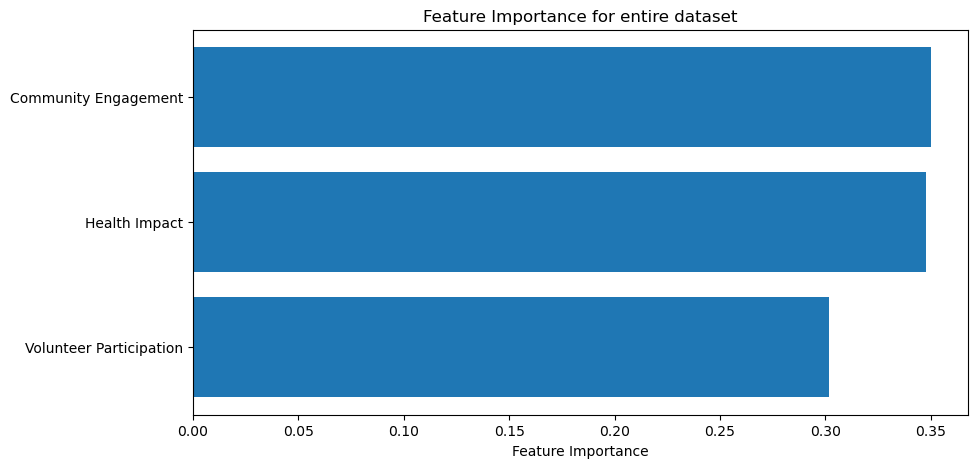

[(0.350172946593074, 'Community Engagement'),
 (0.3479420815007261, 'Health Impact'),
 (0.30188497190619995, 'Volunteer Participation')]

In [268]:
# run the feature importance function
feature_importance(X_s_imp, y_s_imp, 'Feature Importance for entire dataset')


In [269]:
# run the RandomForestClassifier model with a depth parameter looping from 1 to 15

for i in range(1, 16):
    print(f'Depth: {i}')
    RandomForestClassifier_model_depth(X_s_imp, y_s_imp, i)

Depth: 1
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 2
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 3
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 4
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 5
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 6
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 7
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 8
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 9
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 10
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 11
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 12
Training Score: 0.40094117647058825
Testing Score: 0.40231372549019606
Depth: 13
Training Score: 0.400941176

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [271]:
# Model for Resource Efficiency Feature as indicated by the dataset creator
resource_eff_columns = ['Operational Cost Efficiency', 'Water Usage', 'Material Recycling Rate', 'Resource Efficiency']
df_resource_efficiency = df[resource_eff_columns]
df_resource_efficiency.head(10)

,Operational Cost Efficiency,Water Usage,Material Recycling Rate,Resource Efficiency
0,2.0,1.0,1.0,1.0
1,1.0,1.0,0.0,1.0
2,1.0,1.0,1.0,2.0
3,1.0,1.0,1.0,2.0
4,2.0,2.0,2.0,1.0
5,1.0,1.0,0.0,1.0
6,2.0,1.0,1.0,1.0
7,2.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,2.0,0.0,0.0,1.0


In [272]:
# split the data into features and target
X_re = df_resource_efficiency.drop(columns=['Resource Efficiency'])
y_re = df_resource_efficiency['Resource Efficiency']

In [273]:
# run the ExtraTreesClassifier model
RandomForestClassifier_model(X_re, y_re)

Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686


RandomForestClassifier(random_state=42)

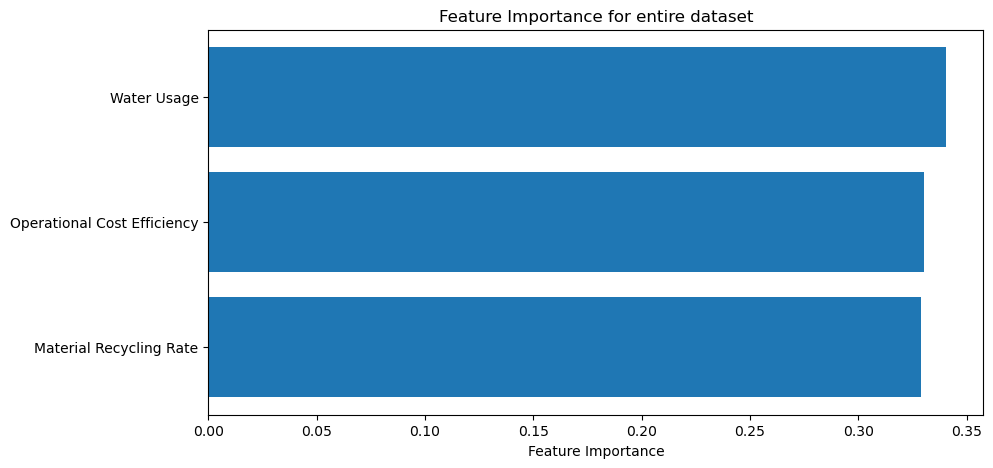

[(0.3406328501596899, 'Water Usage'),
 (0.3303176351780091, 'Operational Cost Efficiency'),
 (0.32904951466230087, 'Material Recycling Rate')]

In [274]:
# run the feature importance function
feature_importance(X_re, y_re, 'Feature Importance for entire dataset')

In [275]:
# run the RandomForestClassifier model with a depth parameter looping from 1 to 15

for i in range(1, 16):
    print(f'Depth: {i}')
    RandomForestClassifier_model_depth(X_re, y_re, i)

Depth: 1
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 2
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 3
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 4
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 5
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 6
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 7
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 8
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 9
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 10
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 11
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 12
Training Score: 0.5020653594771242
Testing Score: 0.5025098039215686
Depth: 13
Training Score: 0.5020653594771242
Testing Score: 0

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [277]:
# import data
df_et = pd.read_csv('sports_management_encoded_eventtype.csv')
df_et.head(10)

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Type Classification,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,Health-Oriented,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,Recreational,1.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,Recreational,1.0,0.0,0.0,0.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,Recreational,0.0,1.0,0.0,0.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,Community Development,0.0,1.0,0.0,0.0,0.0
5,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,Community Development,0.0,1.0,0.0,0.0,0.0
6,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,Youth-Focused,0.0,1.0,0.0,0.0,1.0
7,2.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,Recreational,1.0,0.0,0.0,0.0,0.0
8,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,Youth-Focused,0.0,0.0,0.0,0.0,0.0
9,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,Community Development,0.0,0.0,0.0,1.0,0.0


In [278]:
# Model for Event Type Feature as indicated by the dataset creator
event_type_columns = ['Event Type Classification', 'Event Scale_National', 'Event Scale_Regional', 'Event Focus_Health-Oriented', 'Event Focus_Recreational', 'Event Focus_Youth-Focused']
df_event_type_feature = df_et[event_type_columns]
df_event_type_feature.head(10)

,Event Type Classification,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused
0,Health-Oriented,0.0,0.0,0.0,0.0,0.0
1,Recreational,1.0,0.0,0.0,0.0,0.0
2,Recreational,1.0,0.0,0.0,0.0,0.0
3,Recreational,0.0,1.0,0.0,0.0,0.0
4,Community Development,0.0,1.0,0.0,0.0,0.0
5,Community Development,0.0,1.0,0.0,0.0,0.0
6,Youth-Focused,0.0,1.0,0.0,0.0,1.0
7,Recreational,1.0,0.0,0.0,0.0,0.0
8,Youth-Focused,0.0,0.0,0.0,0.0,0.0
9,Community Development,0.0,0.0,0.0,1.0,0.0


In [279]:
# split the data into features and target
X_et = df_event_type_feature.drop(columns=['Event Type Classification'])
y_et = df_event_type_feature['Event Type Classification']

In [280]:
# run the ExtraTreesClassifier model
RandomForestClassifier_model(X_et, y_et)

Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137


RandomForestClassifier(random_state=42)

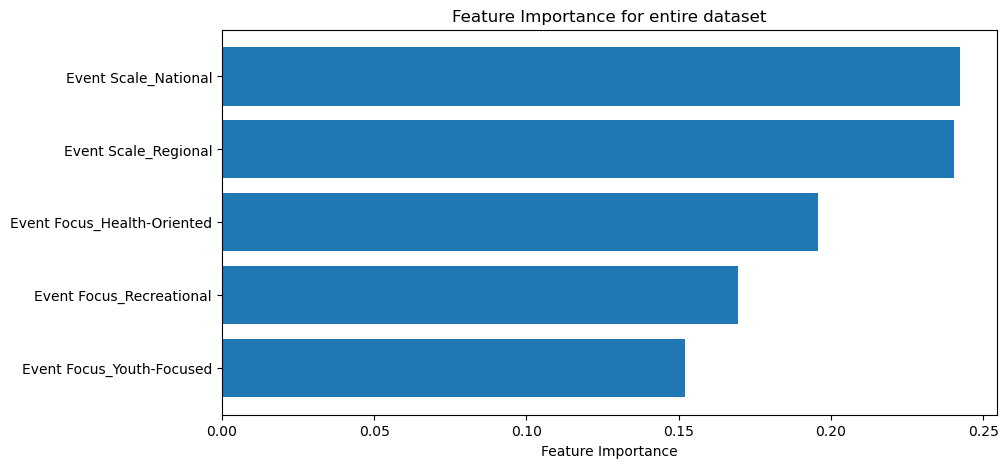

[(0.2423248752253691, 'Event Scale_National'),
 (0.24050784833972894, 'Event Scale_Regional'),
 (0.19587988543485604, 'Event Focus_Health-Oriented'),
 (0.16938398045814115, 'Event Focus_Recreational'),
 (0.1519034105419048, 'Event Focus_Youth-Focused')]

In [281]:
# run the feature importance function
feature_importance(X_et, y_et, 'Feature Importance for entire dataset')

In [282]:
# run the RandomForestClassifier model with a depth parameter looping from 1 to 15

for i in range(1, 16):
    print(f'Depth: {i}')
    RandomForestClassifier_model_depth(X_et, y_et, i)

Depth: 1
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 2
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 3
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 4
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 5
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 6
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 7
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 8
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 9
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 10
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 11
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 12
Training Score: 0.5019084967320262
Testing Score: 0.4989019607843137
Depth: 13
Training Score: 0.5019084967320262
Testing Score: 0

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I